In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Gilbert    112
Edwards    112
Somerst    111
NWAmes      99
NridgHt     95
BrkSide     85
SawyerW     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
NPkVill     18
Blmngtn     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',


/Users/jonahwork/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jonahwork/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


lambda of LotArea = 0.05253143657204427
lambda of patioSF = 0.6151242703233625
lambda of Bsmt_ratio = 3.023308390020235


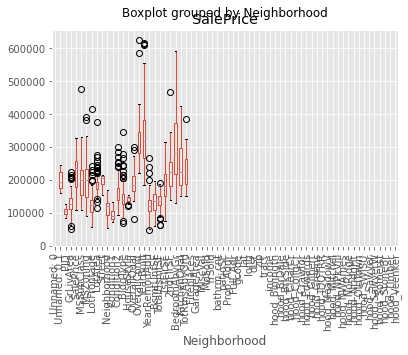

In [2]:
# Importing box coxed data from module for training data
from Box_cox import X1, Y

NAmes      74
CollgCr    48
Edwards    42
OldTown    37
Gilbert    31
Somerst    28
SawyerW    27
NWAmes     24
Sawyer     23
NoRidge    19
Mitchel    19
Crawfor    19
BrkSide    18
NridgHt    15
IDOTRR     12
Timber     10
SWISU       9
BrDale      8
Veenker     8
ClearCr     6
StoneBr     5
Blmngtn     5
MeadowV     4
NPkVill     4
Greens      1
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',
       'hood_BrDale', 'ho

/Users/jonahwork/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/jonahwork/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


lambda of LotArea = 0.21942042517570823
lambda of patioSF = 0.6110035184509113
lambda of Bsmt_ratio = 2.9330720015313356


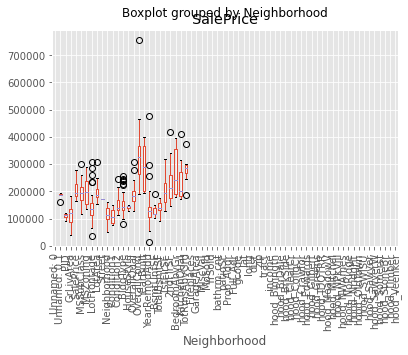

In [3]:
# Importing box coxed data from module for testing data
from Box_cox_test import X1_test, Y_test

In [4]:
# Removing unnecesary columns (no correlation to price, multicollinearity issues, etc)
rm_cols = ['MSZoning_RL', 'YearRemodAdd', 'TotalBsmtSF', 'LotFrontage']
X1.drop(rm_cols, axis = 1, inplace = True)

/Users/jonahwork/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
# Dropping above columns
X1_test.drop(rm_cols, axis = 1, inplace = True)

In [6]:
# Scaling training Data
scaler = StandardScaler().fit(X1)
features = scaler.transform(X1)
X1_std = pd.DataFrame(features, columns = X1.columns)

In [7]:
# Scaling test Data
scaler = StandardScaler().fit(X1_test)
features = scaler.transform(X1_test)
X1_std_test = pd.DataFrame(features, columns = X1.columns)

In [8]:
# Creating list of alphas to try in cross validation
alphas = 10**np.linspace(10,-2,500)*0.5

# Running cross validation
lassocv = LassoCV(alphas = alphas, random_state=0)
lassocv.fit(X1_std, Y)


LassoCV(alphas=array([5.00000000e+09, 4.73066188e+09, 4.47583236e+09, 4.23472990e+09,
       4.00661506e+09, 3.79078823e+09, 3.58658747e+09, 3.39338653e+09,
       3.21059285e+09, 3.03764584e+09, 2.87401508e+09, 2.71919871e+09,
       2.57272194e+09, 2.43413552e+09, 2.30301442e+09, 2.17895651e+09,
       2.06158130e+09, 1.95052881e+09, 1.84545846e+09, 1.74604799e+09,
       1.65199253e+09, 1.56300362e+0...
       1.78680112e-02, 1.69055039e-02, 1.59948446e-02, 1.51332403e-02,
       1.43180486e-02, 1.35467693e-02, 1.28170370e-02, 1.21266137e-02,
       1.14733818e-02, 1.08553380e-02, 1.02705867e-02, 9.71733463e-03,
       9.19388490e-03, 8.69863216e-03, 8.23005751e-03, 7.78672386e-03,
       7.36727155e-03, 6.97041413e-03, 6.59493448e-03, 6.23968103e-03,
       5.90356423e-03, 5.58555325e-03, 5.28467277e-03, 5.00000000e-03]),
        random_state=0)

In [9]:
# Checking score
lassocv.score(X1_std,Y)

0.6292120353971753

In [10]:
# Creating lasso alpha variable
lassocv_alpha = lassocv.alpha_

In [11]:
# Creating lasso model with best alpha
las = Lasso(alpha = lassocv.alpha_, random_state = 0)
las.fit(X1_std,Y)

Lasso(alpha=0.03285528773018135, random_state=0)

In [12]:
# Calculating score of best model (training)
print('Score for training data:', las.score(X1_std,Y))

# Predicting Ys (training)
pred = las.predict(X1_std)

# Calculating RMSE (training)
RMSE = mean_squared_error(Y, pred, squared = False)
print('RMSE for training data is:', RMSE)

Score for training data: 0.6292120353971753
RMSE for training data is: 8.991638559569683


In [13]:
# Calculating score of best model (test)
print('Score for test data:', las.score(X1_std_test,Y_test))

# Predicting Ys (test)
pred = las.predict(X1_std_test)

# Calculating RMSE (test)
RMSE = mean_squared_error(Y_test, pred, squared = False)
print('RMSE for test data is:', RMSE)

Score for test data: 0.5846379229689649
RMSE for test data is: 9.241830035528416


In [15]:
# Checking coeficients
las.coef_

array([ 0.36930858,  2.85266925,  3.08662484,  1.79941002, -0.56639926,
        0.83098384,  0.        , -1.00513356, -0.31818159,  2.2385536 ,
        0.2388271 ,  0.13481732,  0.1599923 ,  0.48093321,  0.61783807,
        2.29504844,  1.67766887,  0.19844963,  1.67085176,  1.02962465,
        0.18500868, -1.0179629 , -0.18494878,  0.34376228, -0.29734308,
        1.76902059,  3.27367414, -1.27079119,  0.12832611,  0.71768127,
        0.45928779,  3.38473567,  2.00926932,  1.24975295,  0.34322276,
       -0.29715334, -0.50792591, -0.20410522,  0.11311206, -0.64116696,
       -0.71110404, -2.05247485, -0.80462413,  0.        , -2.60706679,
       -4.20992689,  1.38723741, -0.        ,  3.05837723, -1.37599446,
       -7.4182248 ])

In [18]:
# Creating feature importance DF
feat_imp = pd.DataFrame()

feat_imp['Feature'] = X1_std.columns
feat_imp['Importance'] = las.coef_
feat_imp['Abs Importance'] = abs(las.coef_)
feat_imp = feat_imp.sort_values(by = 'Abs Importance', ascending = False)
feat_imp

,Feature,Importance,Abs Importance
50,bsmt_above_ratio,-7.418225,7.418225
45,HouseStyle_2Story,-4.209927,4.209927
31,hood_Somerst,3.384736,3.384736
26,hood_NridgHt,3.273674,3.273674
2,OverallCond,3.086625,3.086625
48,Bsmt_ratio,3.058377,3.058377
1,OverallQual,2.852669,2.852669
44,HouseStyle_1.5Fin,-2.607067,2.607067
15,hood_CollgCr,2.295048,2.295048
9,dist,2.238554,2.238554


In [21]:
np.array(feat_imp.drop('Abs Importance', axis =1))

array([['bsmt_above_ratio', -7.418224796437405],
       ['HouseStyle_2Story', -4.209926892313434],
       ['hood_Somerst', 3.384735667192338],
       ['hood_NridgHt', 3.273674140301733],
       ['OverallCond', 3.086624836523146],
       ['Bsmt_ratio', 3.058377229270386],
       ['OverallQual', 2.8526692481171705],
       ['HouseStyle_1.5Fin', -2.607066793951686],
       ['hood_CollgCr', 2.2950484419514208],
       ['dist', 2.2385536017401932],
       ['BldgType_Duplex', -2.0524748492617526],
       ['hood_StoneBr', 2.009269323979562],
       ['KitchenQual', 1.7994100166302338],
       ['hood_NoRidge', 1.7690205887654524],
       ['hood_Crawfor', 1.6776688719107946],
       ['hood_Gilbert', 1.67085176354578],
       ['HouseStyle_SFoyer', 1.3872374083650785],
       ['Bedr_ratio', -1.375994464254695],
       ['hood_OldTown', -1.27079119224877],
       ['hood_Timber', 1.2497529494387722],
       ['hood_Greens', 1.0296246513400147],
       ['hood_MeadowV', -1.0179629023641352],
       ['ba

In [22]:
# Top 10 Feature Importance by abs value
feat_imp[0:10]

,Feature,Importance,Abs Importance
50,bsmt_above_ratio,-7.418225,7.418225
45,HouseStyle_2Story,-4.209927,4.209927
31,hood_Somerst,3.384736,3.384736
26,hood_NridgHt,3.273674,3.273674
2,OverallCond,3.086625,3.086625
48,Bsmt_ratio,3.058377,3.058377
1,OverallQual,2.852669,2.852669
44,HouseStyle_1.5Fin,-2.607067,2.607067
15,hood_CollgCr,2.295048,2.295048
9,dist,2.238554,2.238554


In [23]:
# No Importance
feat_imp[feat_imp['Importance'] == 0]

,Feature,Importance,Abs Importance
43,BldgType_TwnhsE,0.0,0.0
6,MiscVal,0.0,0.0
47,HouseStyle_SLvl,-0.0,0.0


In [24]:
# Any importance
feat_imp[feat_imp['Importance'] != 0]

,Feature,Importance,Abs Importance
50,bsmt_above_ratio,-7.418225,7.418225
45,HouseStyle_2Story,-4.209927,4.209927
31,hood_Somerst,3.384736,3.384736
26,hood_NridgHt,3.273674,3.273674
2,OverallCond,3.086625,3.086625
48,Bsmt_ratio,3.058377,3.058377
1,OverallQual,2.852669,2.852669
44,HouseStyle_1.5Fin,-2.607067,2.607067
15,hood_CollgCr,2.295048,2.295048
9,dist,2.238554,2.238554


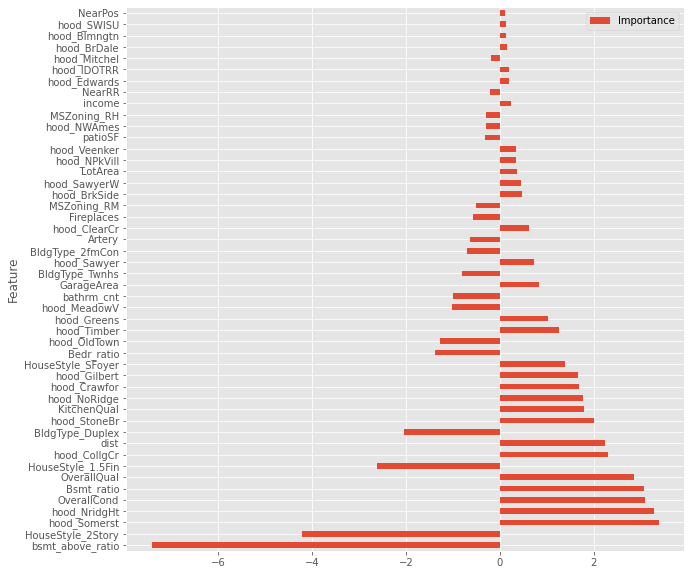

In [25]:
# Plotting all features with any importance
fig = feat_imp[feat_imp['Importance'] != 0].plot.barh(x = 'Feature', y = 'Importance', figsize = (10,10))

<AxesSubplot:ylabel='Feature'>

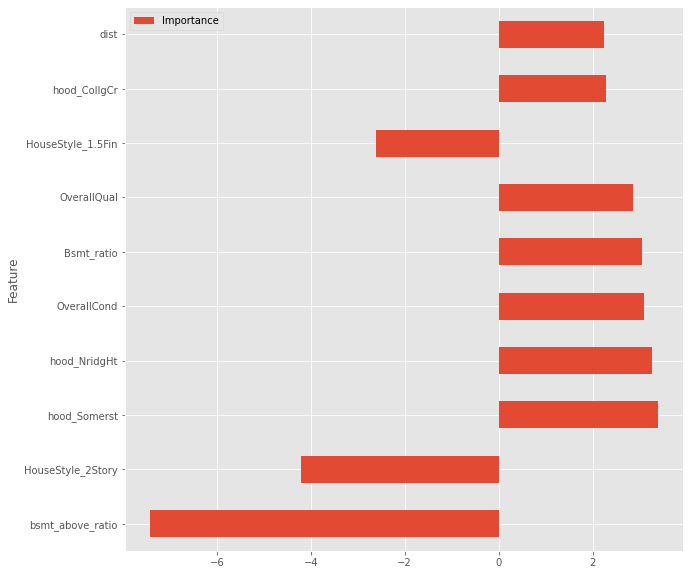

In [26]:
# Plotting top 10 features by importance
feat_imp[0:10].plot.barh(x = 'Feature', y = 'Importance', figsize = (10,10))